In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Add the src directory to the Python path if needed
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Import NeuroWorkflow components
from neuroworkflow import WorkflowBuilder
from neuroworkflow.nodes.network.TVBConnectivitySetUpNode import TVBConnectivitySetUpNode
from neuroworkflow.nodes.network.TVBEpileptorNode import TVBEpileptorNode
from neuroworkflow.nodes.network.TVBIntegratorNode import TVBIntegratorNode
from neuroworkflow.nodes.analysis.TVBVisualizationNode import TVBVisualizationNode
from neuroworkflow.nodes.stimulus.TVBMonitorNode import TVBMonitorNode
from neuroworkflow.nodes.simulation.TVBSimulatorNode import TVBSimulatorNode

In [2]:
# upload and setup connectivity in TVB
load_sc = TVBConnectivitySetUpNode("TVBConnectivity")
# Configure the node
load_sc.configure(
    connectivity_file='connectivity_76.zip',  
)
# Print node information
#print(load_sc)

In [3]:
model = TVBEpileptorNode("TVBEpileptor")
# Configure the node
model.configure(
)
# Print node information
#print(load_sc)

In [4]:
integrator = TVBIntegratorNode("TVBIntegrator")
# Configure the node
integrator.configure(
)
# Print node information
#print(integrator)

In [5]:
monitor = TVBMonitorNode("TVBMonitor")
# Configure the node
monitor.configure(
)
# Print node information
#print(monitor)

In [6]:
simulation = TVBSimulatorNode("TVBSimulator")
# Configure the node
simulation.configure(
    simulation_length='15000' #stable simulation length
)
# Print node information
#print(simulation)

In [7]:
plots = TVBVisualizationNode("TVBVisualization")
# Configure the node
plots.configure(
)
# Print node information
#print(plots)

In [8]:
# Create a workflow builder
workflow_builder = WorkflowBuilder("Resting-State in Epilepsy")

# Add nodes to the workflow
workflow_builder.add_node(load_sc)
workflow_builder.add_node(model)
workflow_builder.add_node(integrator)
workflow_builder.add_node(monitor)
workflow_builder.add_node(simulation)
workflow_builder.add_node(plots)

# Connect the nodes
workflow_builder.connect(
    "TVBConnectivity", "tvb_connectivity", 
    "TVBEpileptor", "tvb_connectivity"
)
workflow_builder.connect(
    "TVBConnectivity", "tvb_connectivity", 
    "TVBSimulator", "tvb_connectivity"
)
workflow_builder.connect(
    "TVBEpileptor", "tvb_model", 
    "TVBSimulator", "tvb_model"
)
workflow_builder.connect(
    "TVBEpileptor", "tvb_coupling", 
    "TVBSimulator", "tvb_coupling"
)
workflow_builder.connect(
    "TVBIntegrator", "tvb_integrator", 
    "TVBSimulator", "tvb_integrator"
)
workflow_builder.connect(
    "TVBMonitor", "tvb_monitor", 
    "TVBSimulator", "tvb_monitor"
)
workflow_builder.connect( 
    "TVBSimulator", "tvb_simdata",
    "TVBVisualization", "data_series",
)
workflow_builder.connect( 
    "TVBSimulator", "tvb_simtime",
    "TVBVisualization", "time_series",
)
workflow_builder.connect( 
    "TVBEpileptor", "tvb_model",
    "TVBVisualization", "tvb_model",
)
workflow_builder.connect( 
    "TVBConnectivity", "tvb_connectivity", 
    "TVBVisualization", "tvb_connectivity",
)

# Build the workflow
workflow = workflow_builder.build()

# Print workflow information
print(workflow)

Workflow: Resting-State in Epilepsy
Nodes:
  TVBConnectivity
  TVBEpileptor
  TVBIntegrator
  TVBMonitor
  TVBSimulator
  TVBVisualization
Connections:
  TVBConnectivity.tvb_connectivity -> TVBEpileptor.tvb_connectivity
  TVBConnectivity.tvb_connectivity -> TVBSimulator.tvb_connectivity
  TVBEpileptor.tvb_model -> TVBSimulator.tvb_model
  TVBEpileptor.tvb_coupling -> TVBSimulator.tvb_coupling
  TVBIntegrator.tvb_integrator -> TVBSimulator.tvb_integrator
  TVBMonitor.tvb_monitor -> TVBSimulator.tvb_monitor
  TVBSimulator.tvb_simdata -> TVBVisualization.data_series
  TVBSimulator.tvb_simtime -> TVBVisualization.time_series
  TVBEpileptor.tvb_model -> TVBVisualization.tvb_model
  TVBConnectivity.tvb_connectivity -> TVBVisualization.tvb_connectivity


Executing workflow...
Executing node: TVBMonitor
Executing node: TVBIntegrator
passed HeunStochastic
Executing node: TVBConnectivity
2025-08-14 01:04:37,015 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.


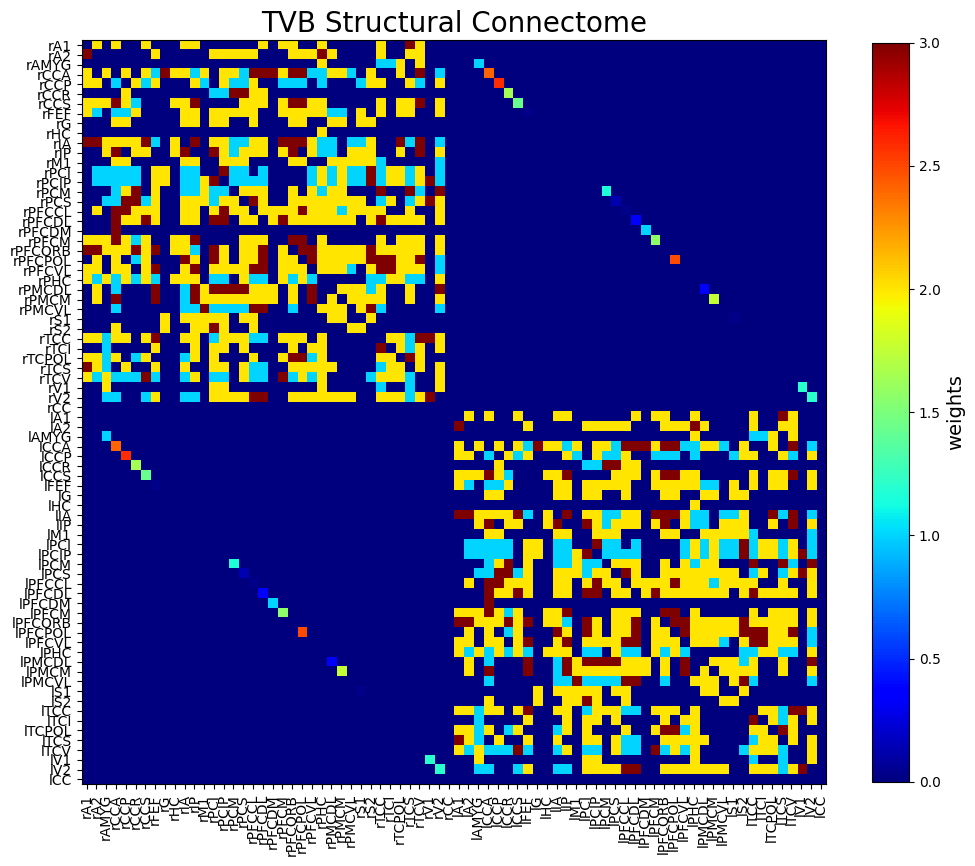

Executing node: TVBEpileptor
Executing node: TVBSimulator
simulation required 15.197 seconds.
Executing node: TVBVisualization
tavg_data.shape:  (15000, 3, 76, 1)
TAVG.shape:  (15000, 3, 76)


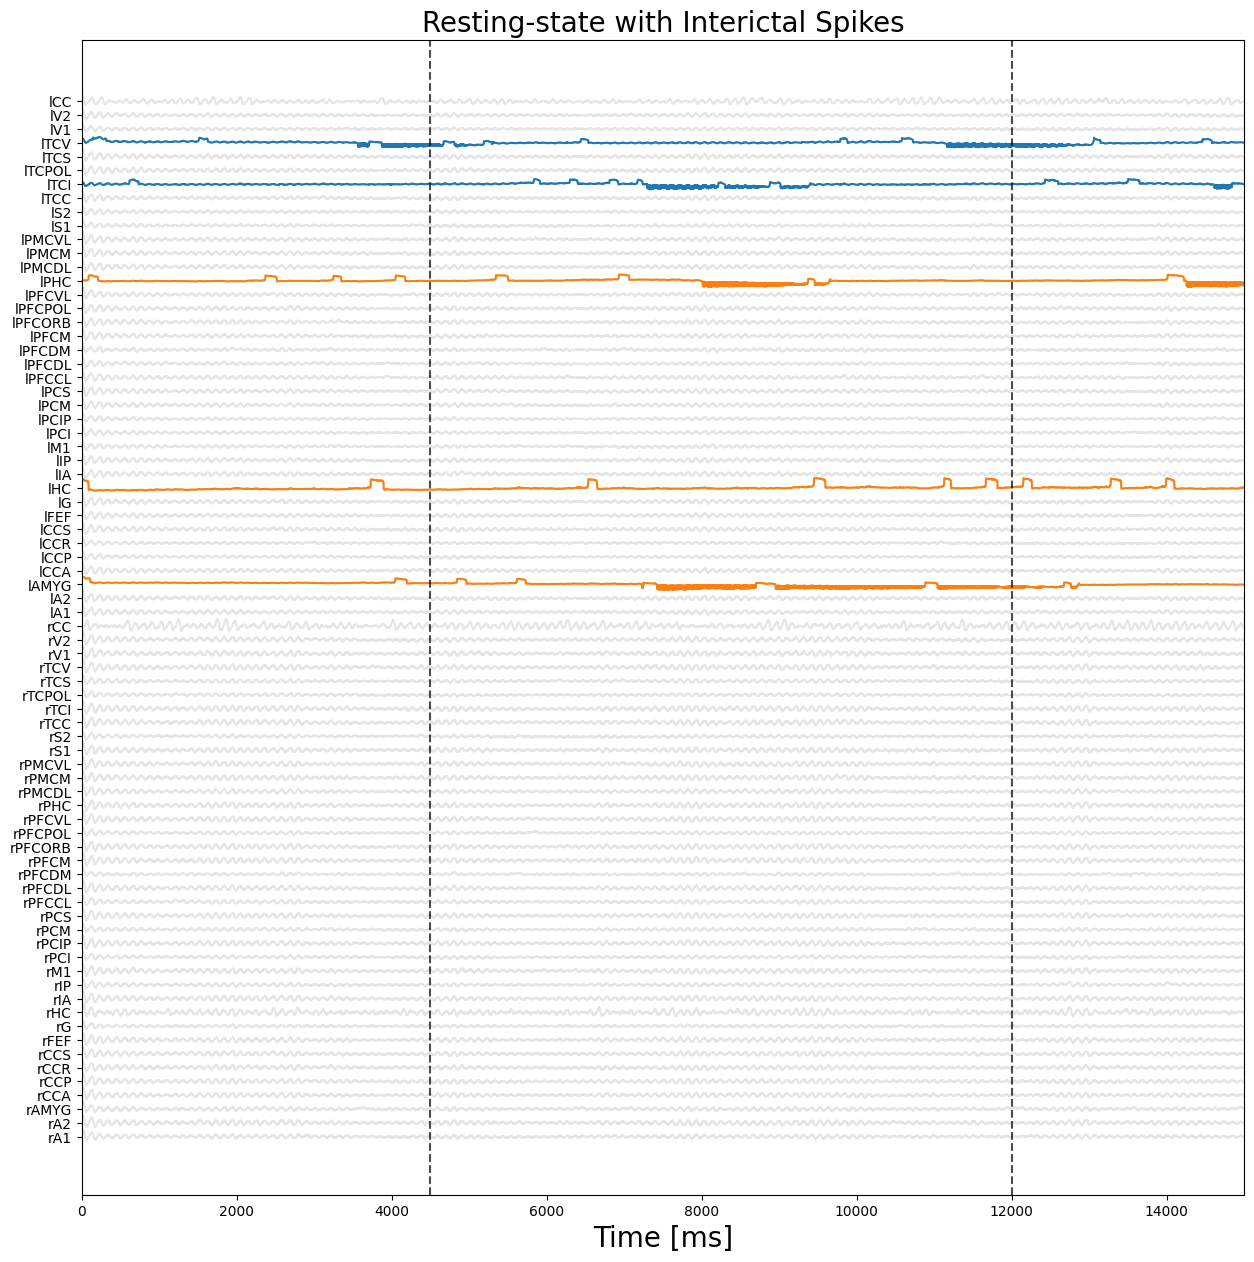

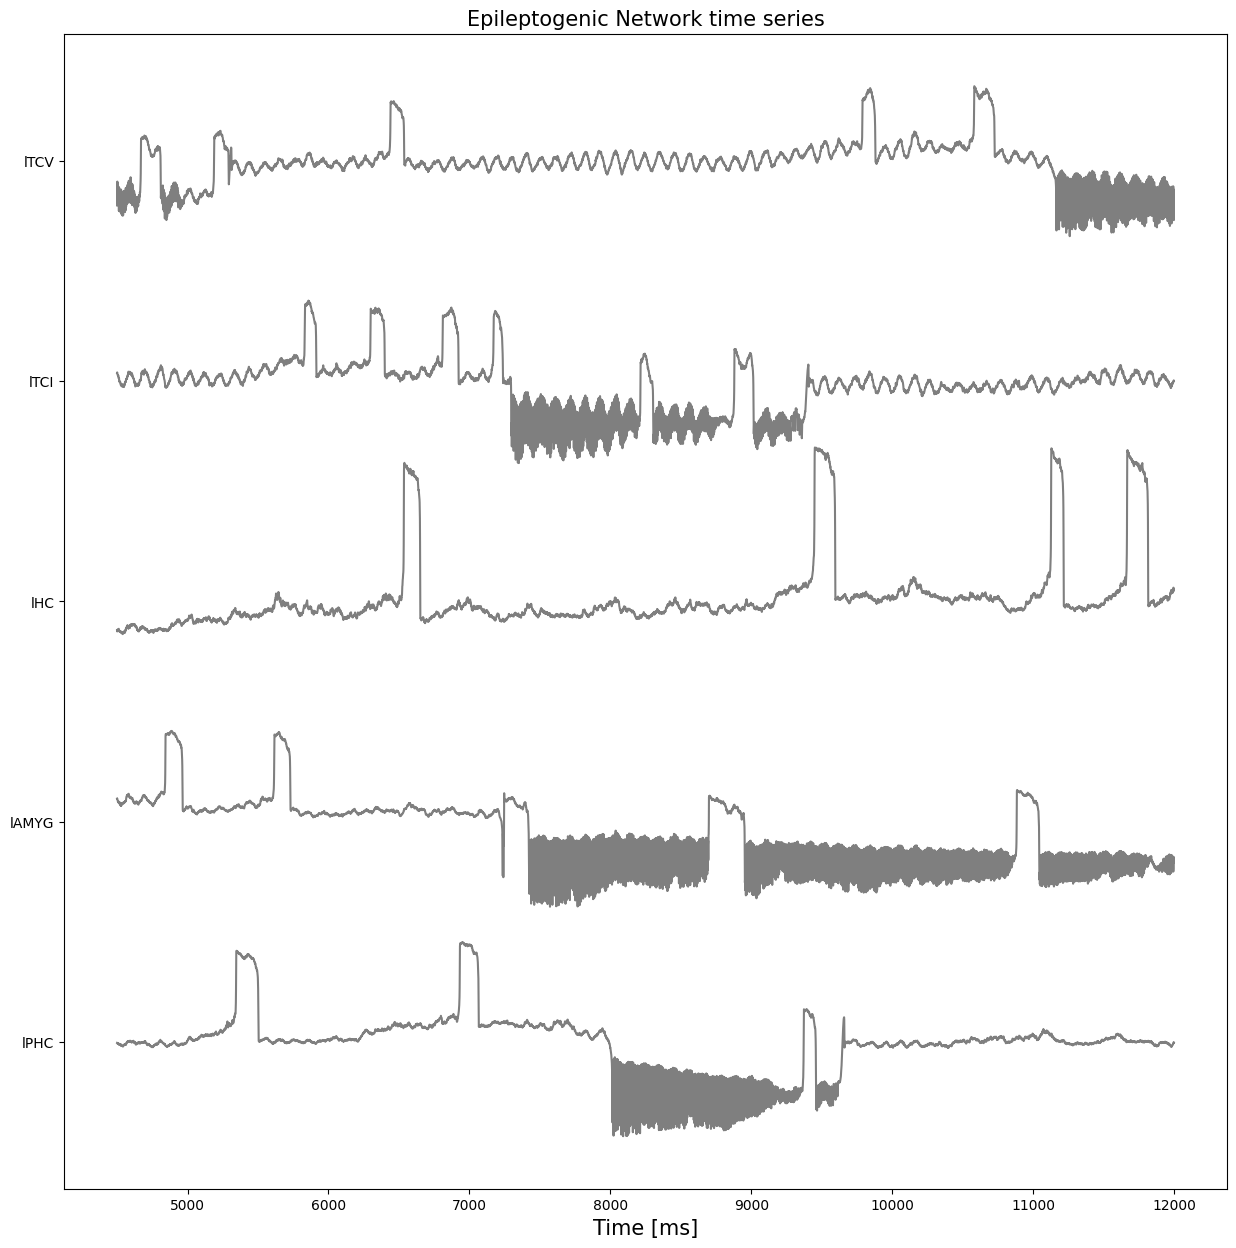


Workflow execution completed successfully!


In [9]:
# Execute the workflow
print("Executing workflow...")
success = workflow.execute()

if success:
    print("\nWorkflow execution completed successfully!")
else:
    print("\nWorkflow execution failed!")